# KIKS
Sint-Bavohumaniora, KA Etterbeek, UGent, Plantentuin Meise, Accenture

# Tensoren en RGB

Bronnen:<br> *Image filtering*, http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html, geraadpleegd op 16/11/2018 <br>
*Convolutions*, Utkarsh Sinha, http://aishack.in/tutorials/image-convolution-examples/, geraadpleegd op 16/11/2018<br> *Image Convolution*, Jamie Ludwig,http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf,  geraadpleegd op 16/11/2018

## Importeren van de nodige modules

In [ ]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage

<div style='color: #690027;' markdown="1">
    <h1>PIXELS</h1> 
</div>

Een digitaal beeld bestaat uit een eindig aantal pixels. Het woord 'pixel' komt van picture (Engels voor afbeelding) en element. <br> Het woord 'digitaal' komt van 'digitus' (Latijn voor vinger) en verwijst naar het tellen op de vingers. <br>
Het aantal pixels in een digitaal beeld kan geteld worden.<br>
*Bron: Uitwiskeling 32/4 - herfst 2016*

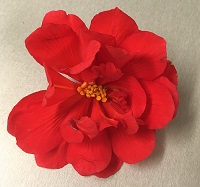 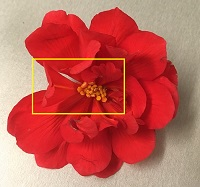
<center>figuur: begonia</center> 
<center>foto door Natacha Gesquière in Plantentuin UGent</center> 

Als men inzoomt op het geselecteerde gebied, dan ziet men de pixels verschijnen.

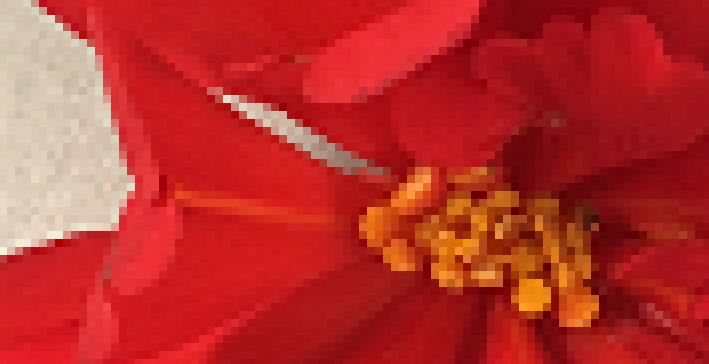
<center>figuur 1: begonia, ingezoomd</center> 

**Een digitale afbeelding is dus een rechthoekig rooster van pixels.** <br>
Men spreekt ook van een rasterafbeelding of een bitmap.<br> GIF, JPEG, PNG zijn bestandsformaten voor het opslaan van rasterafbeeldingen in digitale vorm.

https://nl.wikipedia.org/wiki/Rasterafbeelding   <br>
https://nl.wikipedia.org/wiki/JPEG<br>

Bij figuur 1 zijn er 709 kolommen en 364 rijen van pixels.<br>

Hoeveel pixels bevat figuur 1? Reken uit met Python.

In [ ]:
709 * 364

Antwoord: De afbeelding bevat .................... pixels.

Van de begonia hierboven werd een deel van een bloemblad afgepeld en onder de microscoop gelegd. Met een smartphone werd door de microscoop een foto genomen. Op het bloemblad waren enkele stomata te zien.

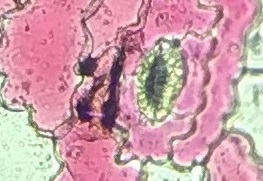
<center>figuur 2: begonia, huidmondje</center> 
<center>foto genomen met smartphone door microscoop, Plantentuin UGent, Natacha Gesquière </center> 

**Elke pixel heeft een bepaalde kleur. <br>Bij een zwart-witafbeelding is een pixel zwart of wit. Bij een grijswaarde-afbeelding is dat een grijswaarde. Bij een kleurenafbeelding is dat een kleur.**

Bekijk de foto van de begonia (figuur 2) in grijswaarden.

In [ ]:
begonia =  np.load("begonia.npy")     # matrix inladen en de naam begonia geven
plt.imshow(begonia, cmap="gray")       # afbeelding tonen, let op de assen

<div style='color: #690027;' markdown="1">
    <h1>GRIJSWAARDEN</h1> 
</div>

Grijswaarden worden door de computer voorgesteld door een getal tussen 0 en 255. 
**Hierbij komt 0 overeen met zwart en 255 met wit.**<br>
De waarden ertussen geven dus grijswaarden weer die stilaan lichter worden naarmate het getal stijgt.

ZELF PRENTEN MAKEN

<table><tr>
<td> <img src="grijswdn1.jpg" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="grijswdn2.jpg" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

Een getal tussen 0 en 255 wordt in de computer voorgesteld door een binair getal. 
Daarbij wordt gebruik gemaakt van 8 bits, m.a.w. een byte. Met 8 bits kan je 256 verschillende binaire getallen maken. ($2^8$=256)<br> Het gebruikte datatype is `uint8`, *unsigned integer van 0 t.e.m. 255*.

Met de instructie `print` worden deze getallen zichtbaar.

In [ ]:
print(begonia)                           # matrix printen

**Een tabel met daarin getallen, noemt men in wiskunde een matrix.**
Het raster van de grijswaarden-begonia is een 181x263-matrix.<br>
Men zegt dat het een matrix is met **dimensie** 181x263.

De dimensie kan in Python opgevraagd worden met het attribuut `shape`. <br>Ook het aantal elementen en het datatype van die elementen kan worden opgevraagd met respectievelijk het attribuut `size` en het attribuut `dtype`.

In [ ]:
print(begonia.shape)                     # dimensie van de matrix printen
print( begonia.size)
print(begonia.dtype)

In [ ]:
# isoleren van het huidmondje
begonia_crop = begonia[50:125,125:200]
plt.imshow(begonia_crop, cmap="gray")

In [ ]:
# kleinste, grootste en gemiddelde grijswaarde
print(begonia.min())
print(begonia.max())
print(begonia.mean())

In [ ]:
# verdeling grijswaarden
plt.hist(begonia.ravel(), bins=256)   # ravel zet alle elementen van de matrix naast elkaar, omdat hist met rijmatrix werkt

Als men een matrix in Python invoert kan men dus bepaalde waarden opvragen en de overeenkomstige afbeelding bekijken.

In [ ]:
# matrix met eerste rij 0 65 130 en tweede rij 200 220 255 ingeven in NumPy
matrix = np.array([[0, 65, 130], [200, 220, 255]], dtype="uint8")
print(matrix)
print("Het datatype van de elementen:", matrix.dtype)

Vraag de dimensie, het aantal elementen en de overeenkomstige afbeelding op.

<div style='color: #690027;' markdown="1">
    <h3>OEFENING</h3> 
</div>

**Geef zelf een 5x2-matrix in.** Noem ze matrix2. Laat vervolgens de matrix, de dimensie en het datatype printen.

<div style='color: #690027;' markdown="1">
    <h3>VOORBEELDEN</h3> 
</div>

In [ ]:
# voorbeeld 1
afb = np.full((15, 18), 140, dtype="uint8")    # 15x18-matrix met allemaal zelfde elementen, nl. 140
print(afb)
plt.imshow(afb, vmin=0, vmax=255, cmap="gray")  # vmin en vmax geven het bereik van de waarden die de kleuren weergeven

In [ ]:
# voorbeeld 2
afb2 = np.zeros((8, 6), dtype="uint8")          # matrix met enkel nullen
print(afb2)

In [ ]:
plt.imshow(afb2, vmin=0, vmax=255, cmap="gray")

In [ ]:
# voorbeeld 3
vierpixels = np.array(([50, 140], [140, 50]), dtype="uint8")
print(vierpixels)

In [ ]:
plt.imshow(vierpixels, vmin=0, vmax=255, cmap="gray")

In [ ]:
print(vierpixels[1,1])       # element op eerste rij, eerste kolom

In [ ]:
# voorbeeld 4
zespixels = np.array(([70, 160], [160, 70], [110, 190]), dtype="uint8")
print(zespixels)

In [ ]:
plt.imshow(zespixels, vmin=0, vmax=255, cmap="gray")

Maak op gelijkaardige manier de afbeelding `twaalfpixels`, gelegen in *landscape*. <br>Maak gebruik van wit, zwart en 5 grijswaarden.

<div style='color: #690027;' markdown="1">
    <h1>KLEUREN</h1> 
</div>

Electromagnetische golven hebben een breed spectrum van golflengtes, waarbij elke golflengte overeenkomt met een andere kleur. Het licht dat de mens kan zien, zichtbaar licht, beslaat slechts een klein deel van het spectrum. Het zichtbaar licht met de kleinste golflengtes is blauw, dat met de grootste golflengtes is rood.

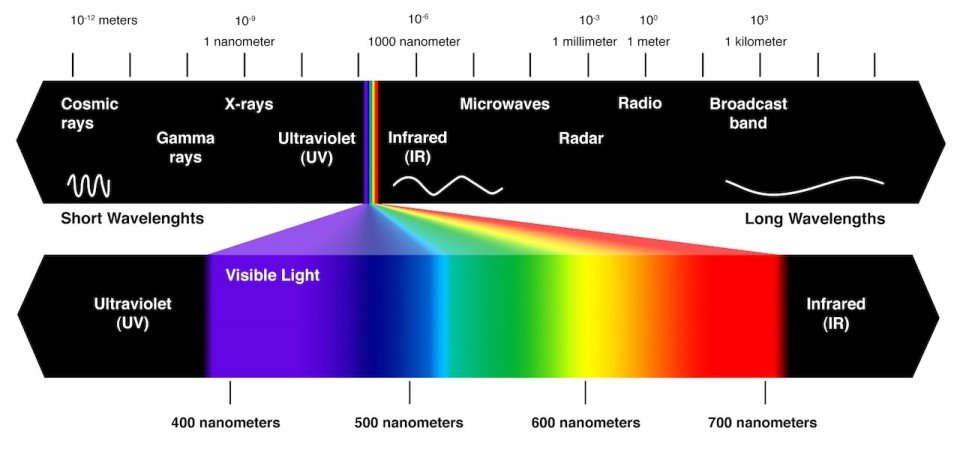
*Source: Gringer [Public domain], from Wikimedia Commons*

Door rood, groen en blauw licht te mengen, kan bijna elke kleur gesimuleerd worden. Kleurenfoto's kunnen dan ook in een **RGB-systeem** worden opgeslagen (RGB = rood, groen, blauw).<br>
In dat geval zijn er wel drie matrices nodig: één voor de rode tinten, één voor de groene tinten en één voor de blauwe tinten. Deze drie roosters worden dan gestapeld tot een soort balk van getallen. In de computerwetenschappen spreekt men van een **tensor**. 

<div style='color: #690027;' markdown="1">
    <h3>VOORBEELD</h3> 
</div>
<br>
We hernemen de foto met het huidmondje (figuur 2).      

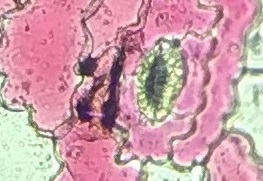
<center>figuur 2: begonia met huidmondje</center>

In [ ]:
begonia_RGB = plt.imread("begonia.jpg")
plt.imshow(begonia_RGB)

In [ ]:
print(begonia_RGB)   
print(begonia_RGB.shape, begonia_RGB.dtype)

De dimensie van de tensor is 181x263x3. Dat wil zeggen dat er drie matrices van dimensie 181x263 op elkaar zijn gestapeld.

De rode matrix is de eerste. We halen er hem eens uit.

In [ ]:
begonia_R = begonia_RGB[:,:,0]
print(begonia_R)

In [ ]:
plt.imshow(begonia_R, cmap="Reds")

In [ ]:
begonia_G =  begonia_RGB[:,:,1]
print(begonia_G)
plt.imshow(begonia_G, cmap="Greens")

In [ ]:
begonia_B =  begonia_RGB[:,:,2]
print(begonia_B)
plt.imshow(begonia_B, cmap="Blues")

Hoe is de roze tint opgebouwd? Beschouw één pixel in die kleur.

In [ ]:
rozepixels_R = np.array(([230, 230], [230, 230]), dtype="uint8")
rozepixels_G = np.array(([125, 125], [125, 125]), dtype="uint8")
rozepixels_B = np.array(([156, 156], [156, 156]), dtype="uint8")
print(rozepixels_R)
print(rozepixels_G)
print(rozepixels_B)

# matrices stapelen tot een tensor
rozepixels = np.dstack([rozepixels_R, rozepixels_G, rozepixels_B])
print(rozepixels.shape)
print(rozepixels.dtype)

plt.figure
plt.subplot(1, 4, 1)
plt.imshow(rozepixels_R, cmap="Reds")
plt.subplot(1, 4, 2)
plt.imshow(rozepixels_G, cmap="Greens")
plt.subplot(1, 4, 3)
plt.imshow(rozepixels_B, cmap="Blues")
plt.subplot(1, 4, 4)
plt.imshow(rozepixels)

<div style='color: #690027;' markdown="1">
    <h3>OEFENING</h3> 
</div>
<br>
Probeer nu zelf kleuren te mengen, door de waarden in de rode, groene en blauwe matrix aan te passen.

<div style='color: #690027;' markdown="1">
    <h3>OEFENINGEN</h3> 
</div>

### Stomata op bezonde en beschaduwde bladeren

In de Plantentuin Meise ging men na of er bij een bepaalde plant meer stomata voorkwamen op de bezonde bladeren in de kruin, dan op de beschaduwde bladeren aan de voet van de plant. <br>
Daar zijn ook foto's van.<br><br> Merk je een verschil op in het aantal huidmondjes?

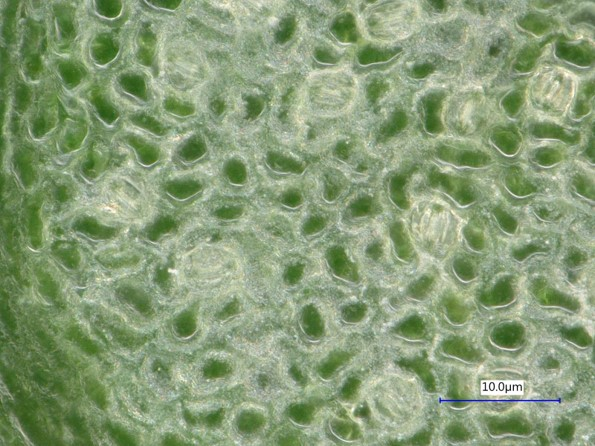
<center>figuur: schaduwblad</center> 
<center>foto door Sofie Meeuws, Plantentuin Meise</center>

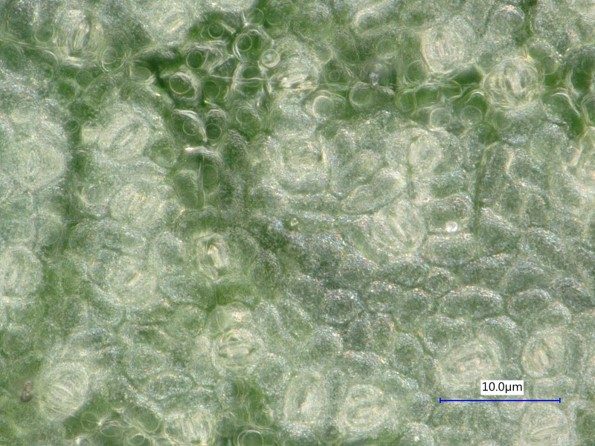
<center>figuur: bezond blad</center> 
<center>foto door Sofie Meeuws, Plantentuin Meise</center>

In [ ]:
schaduwblad = plt.imread("schaduwblad.jpg")
print(schaduwblad)

In [ ]:
plt.imshow(schaduwblad)

- Bepaal de dimensie. 
- Probeer een huidmondje te isoleren.
- Toon van de foto enkel de groentinten.

In [ ]:
schaduwblad.shape

Antwoord: 

### Foto's testset KIKS-neuraal netwerk

Bekijk nu de dimensie van twee foto's uit de testset van het KIKS-neuraal netwerk.<br>
De foto's hebben als naam: Coffea Eugenioides_Bamps 6484_blad2-vlak2.jpg en Coffea pseudozanguebariae_R&M 1944_blad2-vlak3.jpg

Zijn het grijswaardefoto's of kleurenfoto's? Hebben de foto's hetzelfde formaat? Hoeveel pixels bevatten ze?

Antwoord: 

Bekijk de foto's.